In [1]:
import pandas as pd
import numpy as np

In [2]:
# Import Packages
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
from pandas import DataFrame
import matplotlib.pyplot as plt

#importing packages for the prediction of time-series data
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error

%matplotlib inline

In [3]:
def bringFile(folnum,filenum):
    df = pd.read_csv("/home/snu/Desktop/SNU_HIP/GF"+str(folnum)+"/GF"+str(folnum)+"_N_"+str(filenum)+"_Raw.csv", header = None)
    return df

In [4]:
def want_fig(data):
    gr = data.plot(kind = "line", figsize = (20,4))
    return gr
def want_fig_20(data):
    gr = data.plot(kind = "line", figsize = (20,4))
    gr.xticks(data == 1)
    return gr

In [57]:
def get_three(df):
    cut_df = df.iloc[:, 1:4] # get values of accelerator
    return cut_df

In [5]:
df.head()

NameError: name 'df' is not defined

In [33]:
sample = ['050','051','052','053','054','055','065']

In [34]:
for i in range(126, 133): sample.append(i)

In [35]:
sample

['050',
 '051',
 '052',
 '053',
 '054',
 '055',
 '065',
 126,
 127,
 128,
 129,
 130,
 131,
 132]

In [6]:
df_50 = bringFile('050',18)
df_50_c = pd.read_csv("/home/snu/Desktop/SNU_HIP/GF050/GF050_N_20_Filtered.csv")

In [8]:
df_50.head()

,0,1,2,3,4,5,6,7,8,9
0,529301,254,4,19,88,0,144,-19,52,-9
1,529302,252,3,19,98,176,130,-19,52,-9
2,529303,252,6,19,-8,214,44,-19,52,-9
3,529304,252,5,17,26,130,-32,-19,52,-9
4,529305,252,5,17,174,60,62,-19,52,-9


In [10]:
df_50.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [13]:
df_50.rename(columns = {0:'Time',1:"Accelometer X axis"}, inplace = True)
#df.rename(columns={'age': 'is_just_a_number'}, inplace=True)

In [14]:
df_50.head()

,Time,Accelometer X axis,2,3,4,5,6,7,8,9
0,529301,254,4,19,88,0,144,-19,52,-9
1,529302,252,3,19,98,176,130,-19,52,-9
2,529303,252,6,19,-8,214,44,-19,52,-9
3,529304,252,5,17,26,130,-32,-19,52,-9
4,529305,252,5,17,174,60,62,-19,52,-9


In [17]:
df_50.rename(columns = {'Accelometer X axis':"Acc X axis", 2:"Acc Y axis", 3:'Acc Z axis', 4:'Gyro X axis', 5:'Gyro Y axis', 6:'Gyro Z axis',
                       7: 'Mag X axis', 8: 'Mag Y axis', 9:'Mag Z axis'})

,Time,Acc X axis,Acc Y axis,Acc Z axis,Gyro X axis,Gyro Y axis,Gyro Z axis,Mag X axis,Mag Y axis,Mag Z axis
0,529301,254,4,19,88,0,144,-19,52,-9
1,529302,252,3,19,98,176,130,-19,52,-9
2,529303,252,6,19,-8,214,44,-19,52,-9
3,529304,252,5,17,26,130,-32,-19,52,-9
4,529305,252,5,17,174,60,62,-19,52,-9
5,529306,255,5,18,62,184,118,-19,52,-9
6,529307,259,4,19,230,342,-192,-19,52,-9
7,529308,251,5,20,178,258,230,-19,52,-9
8,529309,251,4,20,-216,88,74,-19,52,-9
9,529310,254,2,20,8,272,-42,-19,52,-9


In [53]:
df_51 = bringFile('051',18)
df_51_c = pd.read_csv("/home/snu/Desktop/SNU_HIP/GF051/GF051_N_20_Filtered.csv")

In [54]:
df_126 =bringFile('126',18)
df_126_c = pd.read_csv("/home/snu/Desktop/SNU_HIP/GF126/GF126_N_20_Filtered.csv")
df_127 = bringFile('127',18)
df_127_c = pd.read_csv("/home/snu/Desktop/SNU_HIP/GF127/GF127_N_20_Filtered.csv")

In [91]:
get_three(df_126)

,1,2,3
0,237,-7,-86
1,237,-10,-86
2,236,-9,-86
3,238,-9,-87
4,237,-9,-85
5,236,-9,-87
6,237,-11,-86
7,237,-10,-87
8,238,-10,-85
9,237,-11,-86


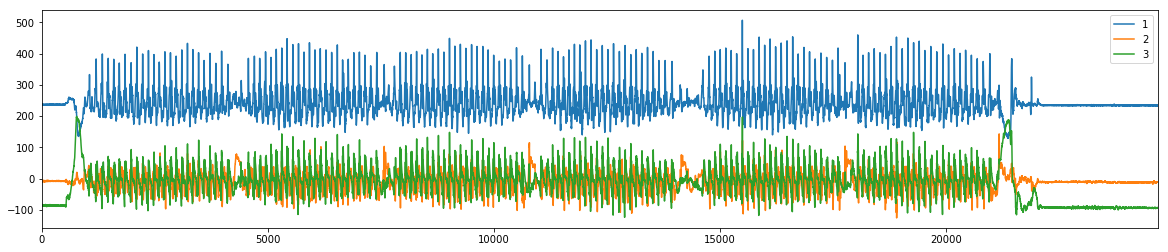

In [92]:
want_fig(get_three(df_126))

In [93]:
df_126_c = df_126_c.iloc[:,1]

In [94]:
for i in enumerate(df_126_c):
    if i[1] == 1:
        print(i[0])

76
472
2728
3904
6040
7108
9184
10360
12520
13984
16168
17320
19564
20536


AttributeError: 'AxesSubplot' object has no attribute 'xticks'

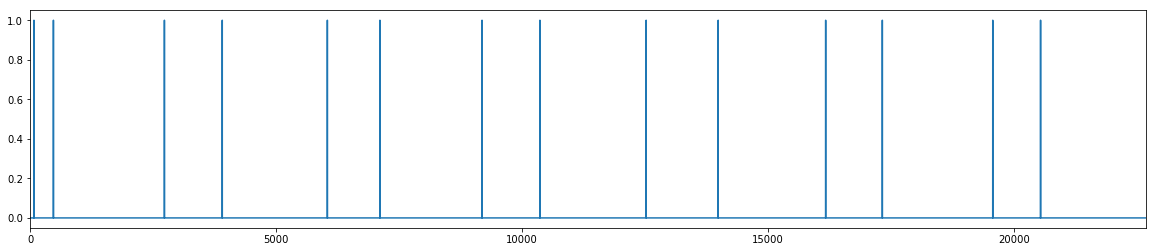

In [96]:
want_fig_20(df_126_c)

In [49]:
df_50.head(3)

,0,1,2,3,4,5,6,7,8,9
0,529301,254,4,19,88,0,144,-19,52,-9
1,529302,252,3,19,98,176,130,-19,52,-9
2,529303,252,6,19,-8,214,44,-19,52,-9


In [59]:
df_50_acc = get_three(df_50)

20685

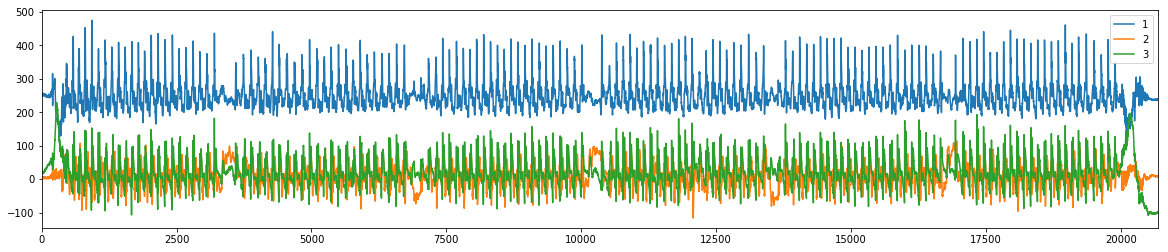

In [86]:
want_fig(df_50_acc)
len(df_50_acc)

In [87]:
df_50_c = df_50_c.iloc[:,1]
len(df_50_c)

IndexingError: Too many indexers

In [76]:
df_50_c.iloc[:,1]

IndexingError: Too many indexers

20685

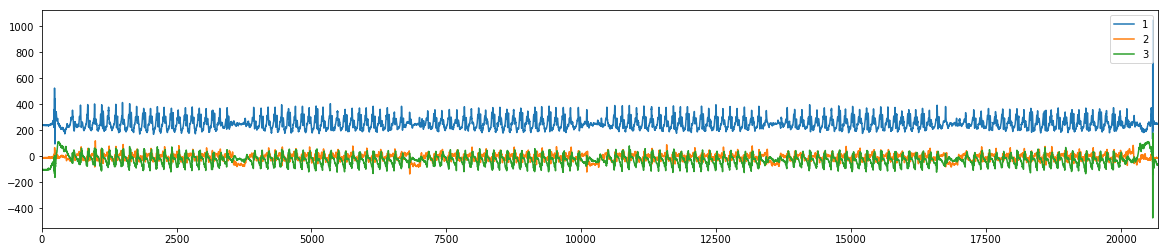

In [82]:
df_51_c
df_51_acc = get_three(df_51)
want_fig(df_51_acc)
len(df_51_acc)

In [83]:
df_51_c = df_51_c.iloc[:,1]

AttributeError: 'AxesSubplot' object has no attribute 'xticks'

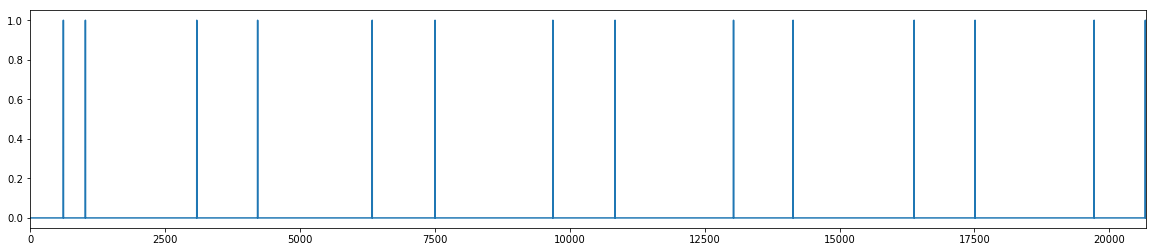

In [85]:
want_fig_20(df_51_c)

In [88]:
df_126_acc = get_three(df_126)

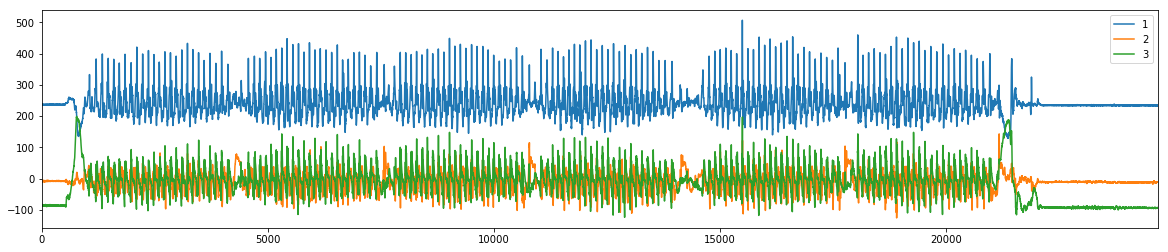

In [90]:
want_fig(df_126_acc)